## Integrantes do Grupo
* Lucca Mifune
* Leo Mifune


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
import sklearn
import matplotlib
import warnings 

warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('online_shoppers_intention.csv', sep = ',')

In [6]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


"Administrativo", "Duração administrativa", "Informativo", "Duração informativo", "Relacionado ao produto" e "Duração relacionada ao produto" representam o número de diferentes tipos de páginas visitadas pelo visitante nessa sessão e o tempo total gasto em cada uma dessas categorias de página. Os valores desses recursos são derivados das informações de URL das páginas visitadas pelo usuário e atualizadas em tempo real quando um usuário executa uma ação, por exemplo, passando de uma página para outra.

Os recursos "Taxa de rejeição", "Taxa de saída" e "Valor da página" representam as métricas medidas pelo "Google Analytics" para cada página no site de comércio eletrônico.

O valor do recurso "Taxa de rejeição" de uma página da web refere-se à porcentagem de visitantes que entram no site a partir dessa página e saem ("rejeição") sem acionar outras solicitações ao servidor durante essa sessão.

O valor do recurso "Taxa de saída" para uma página da web específica é calculado como a porcentagem que foi a última na sessão, para todas as exibições de página a página.

O recurso "Valor da página" representa o valor médio para uma página da web que um usuário visitou antes de concluir uma transação de comércio eletrônico.

O recurso "Dia especial" indica a proximidade do horário de visita do site a um dia especial específico (por exemplo, dia das mães, dia dos namorados) em que as sessões têm mais probabilidade de serem finalizadas com a transação. O valor desse atributo é determinado considerando a dinâmica do comércio eletrônico, como a duração entre a data do pedido e a data de entrega. Por exemplo, no dia dos namorados, esse valor assume um valor diferente de zero entre 2 e 12 de fevereiro (dia dos namorados nos EUA e Europa), zero antes e depois dessa data, a menos que esteja próximo de outro dia especial e seu valor máximo de 1 em 8 de fevereiro.

O conjunto de dados também inclui o tipo de sistema operacional, navegador, região, tipo de tráfego, tipo de visitante como visitante novo ou recorrente, um valor booleano indicando se a data da visita é final de semana e mês do ano.

A variável alvo (Revenue) é booleana, com True se a sessão gerou receita e False se não gerou.

## Análise Exploratória 

In [7]:
print(df.isna().sum())

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [8]:
### Nesse caso, como são muito poucos NaNs podemos dropar

In [9]:
df = df.dropna()

In [10]:
print(df.isna().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [11]:
df.shape

(12316, 18)

In [12]:
df.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [4]:
## Separar as variaveis em Categoricas e Continuas
df2 = df.copy()
continuous = []
categorical = []

In [5]:
for i in df.columns:
    if(len(np.unique(df[i])) >= 30): ### Nesse caso, as variaveis categoricas nao tem mais de 30 valores unicos.
        continuous.append(i)
    else: 
        categorical.append(i)
    

### Plotando Boxplots para as variaveis continuas, a fim de verificar distribuicao e outliers

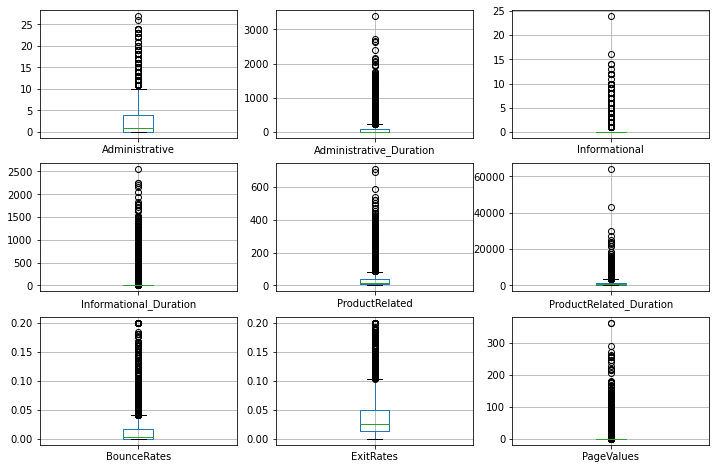

In [6]:
fig = plt.figure(figsize = (12,8))

for i, col in enumerate(continuous):
    plt.subplot(3,3,i+1);
    df.boxplot(col)

#### Todas as variaveis tem muitos outliers. Nesse caso nao vamos remover os outliers nem colunas

<AxesSubplot:>

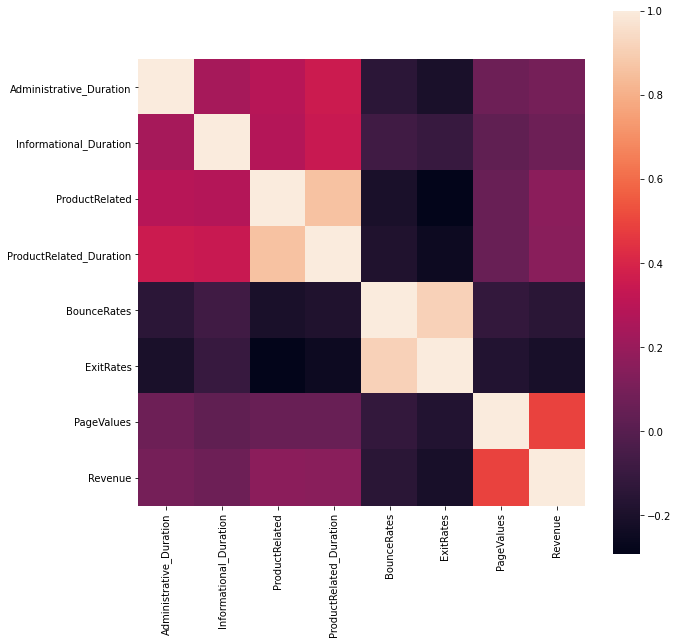

In [7]:
### Plotando um heatmap com a correlacao entre as variaveis
plt.figure(figsize=(10,10))

sns.heatmap(df[['Administrative_Duration',
                'Informational_Duration',
                'ProductRelated',
                'ProductRelated_Duration',
                'BounceRates',
                'ExitRates',
                'PageValues',
                'Revenue']].corr(), vmax=1., square=True)

<AxesSubplot:title={'center':'Venda ou Nao'}, xlabel='Revenue', ylabel='count'>

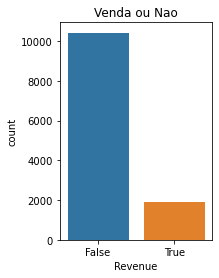

In [8]:
plt.subplot(1,2,2)
plt.title('Venda ou Nao')
sns.countplot(df['Revenue'])

### Aqui temos um problema, pois temos muito mais falsos do que verdadeiros na variavel dependente e isso vai enviezar o modelo. Para solucinoar isso, temos duas opcoes:
#####  1) Remover aleatoriamente registros da cateoria predominante(false)
##### 2) Criar registros artificiais para a categoria menos predominante(True)

In [9]:
### Transformando as categoricas em números com label encoder

In [10]:
lb = LabelEncoder()
df['Month'] = lb.fit_transform(df['Month'])
df['VisitorType'] = lb.fit_transform(df['VisitorType'])

df = df.dropna()

In [11]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [12]:
df.iloc[:,0:17].head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True


In [13]:
df.iloc[:,17].head()

0    False
1    False
2    False
3    False
4    False
Name: Revenue, dtype: bool

In [25]:
#pip install imblearn

#### Criando registros artificialmente

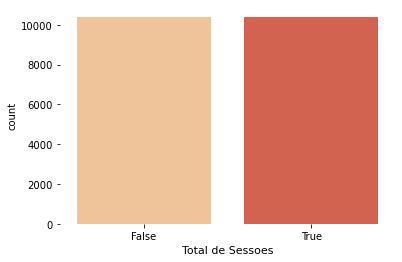

In [14]:
import imblearn
from imblearn.over_sampling import SMOTE

seed = 14

x = df.iloc[:,0:17]
y = df.iloc[:,17]

smote_bal = SMOTE(random_state = seed)

x_res,y_res = smote_bal.fit_resample(x,y)

x = x_res
y = y_res


sns.countplot(y_res, palette = 'OrRd')
plt.box(False)
plt.xlabel("Receita Não (0) / Sim(1)", fontsize = 11)
plt.xlabel("Total de Sessoes", fontsize = 11)
plt.show()

A padronizacao deve ser feita depois da divisao entre treino e teste para que a escalas de padronizacao de treino 
e teste sejam especificas para cada uma das bases. Nao correr o risco de usar uma escala que nao atende a uma das bases

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size = 0.3)

In [16]:
# Padronizar 
sc = StandardScaler()
X_treino_scaled = sc.fit_transform(X_train)
X_teste_scaled = sc.fit_transform(X_test)

In [17]:
X_treino_scaled

array([[-0.81541855, -0.53165955, -0.46161782, ..., -0.77891469,
        -2.05162844, -0.69664991],
       [-0.21987259, -0.49256289, -0.46161782, ..., -0.50771189,
         0.5451643 , -0.69664991],
       [-0.21987259,  0.70807697, -0.46161782, ...,  0.84830211,
        -0.75323207,  1.43544122],
       ...,
       [-0.81541855, -0.53165955, -0.46161782, ..., -0.50771189,
         0.5451643 , -0.69664991],
       [-0.81541855, -0.53165955, -0.46161782, ..., -0.50771189,
         0.5451643 ,  1.43544122],
       [ 0.97121931, -0.01153426, -0.46161782, ..., -0.77891469,
         0.5451643 , -0.69664991]])

### Criando Modelo

###### o SVM precisa de dados linearmente separaveis, se nao forem, precisamos criar outro Plano(3d), ou seja, usar uma funcao kernel

In [30]:
modelo = svm.SVC(kernel = 'linear')

In [31]:
modelo.fit(X_treino_scaled,Y_train)

SVC(kernel='linear')

#### Previsao para treino

In [32]:
previsao_treino = modelo.predict(X_treino_scaled)

In [33]:
SVM_DIC_METRICS = {'accuracy_score': accuracy_score(previsao_treino,Y_train),
                   'Confusion_matrix': confusion_matrix(previsao_treino,Y_train)
                  }

In [34]:
print(SVM_DIC_METRICS)

{'accuracy_score': 0.8456523231075423, 'Confusion_matrix': array([[6639, 1578],
       [ 671, 5683]])}


#### A função svm() aceita os seguintes kernels: radial, linear, polynomial e sigmoide. 

In [80]:
kernel = ['poly', 'rbf', 'sigmoid']
for i in kernel:
    if(i == 'poly'):
        modelo = svm.SVC(kernel = i,degree = 3,shrinking = False)
    else:
        modelo = svm.SVC(kernel = i)
        
    modelo.fit(X_treino_scaled,Y_train)
    previsao_treino = modelo.predict(X_treino_scaled)
    SVM_DIC_METRICS = {'accuracy_score': accuracy_score(previsao_treino,Y_train),
                       'Confusion_matrix': confusion_matrix(previsao_treino,Y_train)
                      }
    print(i,SVM_DIC_METRICS)

poly {'accuracy_score': 0.865005833504907, 'Confusion_matrix': array([[6347, 1027],
       [ 940, 6257]])}
rbf {'accuracy_score': 0.8921144739551163, 'Confusion_matrix': array([[6647,  932],
       [ 640, 6352]])}
sigmoid {'accuracy_score': 0.7225996843044403, 'Confusion_matrix': array([[5264, 2019],
       [2023, 5265]])}


Para a função poly, o melhor resultado que conseguimos chegar foi com o degree = 3, e mesmo assim o rbf foi melhor.
Poranto, usaremos o rbf e testaremos variacões com os demais parametros usando o gridsearch()

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_treino_scaled, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.685 total time=  14.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=  14.6s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=  15.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.676 total time=  14.7s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=  15.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.848 total time=   8.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.853 total time=   8.6s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.850 total time=   8.6s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.840 total time=   8.6s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.838 total time=   8.6s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.830 total time=   9.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [36]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [25]:
modelo = svm.SVC(C = 10, gamma = 0.1, kernel = 'rbf')
        
modelo.fit(X_treino_scaled,Y_train)
previsao_treino = modelo.predict(X_treino_scaled)
SVM_DIC_METRICS = {'accuracy_score': accuracy_score(previsao_treino,Y_train),
                       'Confusion_matrix': confusion_matrix(previsao_treino,Y_train)
                      }
print(SVM_DIC_METRICS)

{'accuracy_score': 0.9455768306910988, 'Confusion_matrix': array([[6873,  407],
       [ 386, 6905]])}


In [26]:
previsao_teste  = modelo.predict(X_teste_scaled)
SVM_DIC_METRICS = {'accuracy_score': accuracy_score(previsao_teste,Y_test),
                       'Confusion_matrix': confusion_matrix(previsao_teste,Y_test)
                      }
print(SVM_DIC_METRICS)

{'accuracy_score': 0.9071257005604484, 'Confusion_matrix': array([[2854,  285],
       [ 295, 2811]])}


## Criando dois modelos alternativos ao SVM (Regressao Logistica e Random Forest)

In [40]:
## Regressao Logistica 

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

## Treino
ModeloRL = LogisticRegression()
ModeloRL.fit(X_treino_scaled, Y_train)
predicted = ModeloRL.predict(X_treino_scaled)
acc = np.mean(predicted == Y_train)
print(round(acc*100,2),'%')
print(confusion_matrix(predicted,Y_train))

## Teste
predicted2 = ModeloRL.predict(X_teste_scaled)
acc2 = np.mean(predicted2 == Y_test)
print(round(acc2*100,2),'%')
print(confusion_matrix(predicted2,Y_test)) 

84.14 %
[[6454 1455]
 [ 856 5806]]
82.82 %
[[2682  657]
 [ 416 2490]]


Utilizando um modelo de Regressão Logistica, tivemos uma boa acurácia nao tivemos overfitting nem underfitting.
Obsevando a Matriz de confusão, nota-se que o modelo não apresenta um viés forte, porém tende a errar mais 
para os casos em que não houve receita e o modelo previu que houve. Entretanto, o modelo de SVM foi mais preciso.

In [18]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(X_treino_scaled, Y_train.values.ravel())

## Treino 
y_pred_train = clf.predict(X_treino_scaled)
print(accuracy_score(Y_train,y_pred_train))
print(confusion_matrix(Y_train,y_pred_train))

## Teste 
y_pred_test = clf.predict(X_teste_scaled)
print(accuracy_score(Y_test,y_pred_test))
print(confusion_matrix(Y_test,y_pred_test))

0.9212133690206574
[[6539  720]
 [ 428 6884]]
0.510648518815052
[[ 100 3049]
 [   7 3089]]


In [42]:
### Grid Search para Random Forest
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,11],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_treino_scaled, Y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 11,
 'max_features': 'sqrt',
 'n_estimators': 500}

In [19]:
### Random Forest com os melhoes parametros
clf2 = RandomForestClassifier(max_depth = 11,n_estimators = 200,max_features = 'sqrt',criterion ='gini')
clf2.fit(X_treino_scaled, Y_train.values.ravel())

## Treino 
y_pred_train = clf2.predict(X_treino_scaled)
print(accuracy_score(Y_train,y_pred_train))
print(confusion_matrix(Y_train,y_pred_train))

## Teste 
y_pred_test = clf2.predict(X_teste_scaled)
print(accuracy_score(Y_test,y_pred_test))
print(confusion_matrix(Y_test,y_pred_test))

0.941253174112964
[[6658  601]
 [ 255 7057]]
0.5136909527622098
[[ 118 3031]
 [   6 3090]]


##### Analisando o  modelo de Random Forest, nota-se que apresentou Overfitting, já que a acurácia do  Treino foi de 94% e no Teste caiu para 51%

### Conclusão: 
O melhor modelo foi o SVM utilizando o parametro rbf, visto que apresentou a melhor acurácia sem underfitting ou overfitting